In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

%matplotlib inline

In [2]:
data = pd.read_csv('HousingData.csv')

In [3]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
#FILLING NULL VALUES

col = ['CRIM','ZN','INDUS','CHAS','AGE','LSTAT']
for c in col:
    data[c].fillna(data[c].mean(),inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [8]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.200000,4.0900,1,296,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900000,4.9671,2,242,17.8,396.90,9.140000,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.100000,4.9671,2,242,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.800000,6.0622,3,222,18.7,394.63,2.940000,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200000,6.0622,3,222,18.7,396.90,12.715432,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.100000,2.4786,1,273,21.0,391.99,12.715432,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.700000,2.2875,1,273,21.0,396.90,9.080000,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.000000,2.1675,1,273,21.0,396.90,5.640000,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.300000,2.3889,1,273,21.0,393.45,6.480000,22.0


In [9]:
#Check the correlation of our target field ‘TAX’ with other features.
data.corr()['TAX'].sort_values(ascending=False)

TAX        1.000000
RAD        0.910228
INDUS      0.716062
NOX        0.668023
CRIM       0.566528
LSTAT      0.524545
AGE        0.500589
PTRATIO    0.460853
CHAS      -0.031483
RM        -0.292048
ZN        -0.308334
B         -0.441808
MEDV      -0.468536
DIS       -0.534432
Name: TAX, dtype: float64

In [10]:
#We are scaling the X data using Standard Scaler to bring everything down to the same scale of [0-1].
from sklearn.preprocessing import StandardScaler

X = data.drop('TAX',axis=1)
y = data['TAX']

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size=0.3, random_state = 42)

In [12]:
#TRAIN MODEL 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rfc = RandomForestRegressor()
params = {'n_estimators':[100,200,300,400,500,600,700,800,900,1000]}
grid_model = GridSearchCV(rfc, params,verbose=2)
grid_model.fit(X_train,y_train)
pred = grid_model.predict(X_test)
print('Random Forest accuracy is --> ',r2_score(y_test,pred)*100)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ...................................n_estimators=100; total time=   0.5s
[CV] END ...................................n_estimators=100; total time=   0.4s
[CV] END ...................................n_estimators=100; total time=   0.4s
[CV] END ...................................n_estimators=100; total time=   0.4s
[CV] END ...................................n_estimators=100; total time=   0.5s
[CV] END ...................................n_estimators=200; total time=   1.0s
[CV] END ...................................n_estimators=200; total time=   0.9s
[CV] END ...................................n_estimators=200; total time=   0.9s
[CV] END ...................................n_estimators=200; total time=   1.0s
[CV] END ...................................n_estimators=200; total time=   0.9s
[CV] END ...................................n_estimators=300; total time=   1.7s
[CV] END ...................................n_es

In [13]:
grid_model.best_params_

res = pd.DataFrame()
res['Y_Test'] = y_test
res['PRED'] = pred
res.head()

,Y_Test,PRED
173,296,371.31750
274,254,255.68625
491,711,674.93000
72,305,305.05625
452,666,666.00000


C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'predicted values')

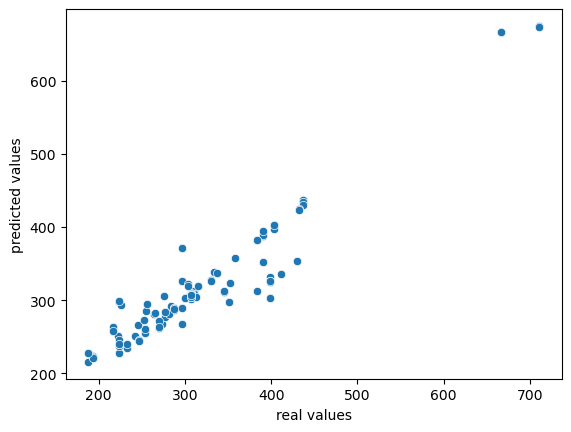

In [14]:
sns.scatterplot(y_test,pred)
plt.xlabel('real values')
plt.ylabel('predicted values')